#Final Project
by: Rushabh shah

under guidance of: Prof. Donghwa Kim

Data source 1: https://data.world/makeovermonday/2020w10/workspace/project-summary?agentid=makeovermonday&datasetid=2020w10

Columns: 8
Rows: 12600

Data source 2: https://data.world/makeovermonday/2020w19-world-happiness-report-2020

Columns: 20
Rows: 153

Description: The first dataset is a survey of men and women in African,
Asian, and South American countries, exploring the attitudes and perceived justifications given for committing acts of violence against women. The second dataset is The World Happiness Report which is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

Hypothesis 1: The responses of people who are married and living together have more values for justifying these violences against women then never married and divorced or widowed.

Hypothesis 2: The happiness(ladder score) of the countries with low average value of justifying violence against women for any specific reason should be high assuming they are social forward then the other countries and believe any of the reasons for commiting violence is less/not justified.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import time 
from ipywidgets import widgets, interactive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://query.data.world/s/kcgkfwzxlaayg2wnu57syvbaufjiad',encoding='utf-8')

In [3]:
#checking the columns and rows
df.shape

(12600, 8)

In [4]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [5]:
df['Question'].value_counts()

... if she goes out without telling him    2100
... if she neglects the children           2100
... if she burns the food                  2100
... if she argues with him                 2100
... if she refuses to have sex with him    2100
... for at least one specific reason       2100
Name: Question, dtype: int64

In [0]:
df['Demographics Response']=df['Demographics Response'].astype('str')

In [28]:
df.dtypes

RecordID                          int64
Country                          object
Gender                           object
Demographics Question            object
Demographics Response            object
Question                         object
Survey Year              datetime64[ns]
Value                            object
dtype: object

# Data anomalies in df:

1) NaN values in value column.

2) Data-year format in survey year.

3) Value has object data-type.


In [0]:
#changing the date time format
df['Survey Year']=pd.to_datetime(df['Survey Year'],format='%d/%m/%Y')

In [25]:
df['Value'].describe()

count     12600
unique      758
top           0
freq       1413
Name: Value, dtype: object

The data types of each columns shows 

In [0]:
df['Value']=df['Value'].astype('float')

In [0]:
#changing the missing values.
df= df.fillna('0')

In [45]:
df.loc[(df['Country']=='Afghanistan')& (df['Gender']=='F')& (df['Question']=='... for at least one specific reason')]

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
30,351,Afghanistan,F,Age,15-24,... for at least one specific reason,2015-01-01,80.1
31,351,Afghanistan,F,Age,25-34,... for at least one specific reason,2015-01-01,81.5
32,351,Afghanistan,F,Age,35-49,... for at least one specific reason,2015-01-01,79.0
45,351,Afghanistan,F,Education,Higher,... for at least one specific reason,2015-01-01,61.1
46,351,Afghanistan,F,Education,No education,... for at least one specific reason,2015-01-01,81.0
47,351,Afghanistan,F,Education,Primary,... for at least one specific reason,2015-01-01,79.8
48,351,Afghanistan,F,Education,Secondary,... for at least one specific reason,2015-01-01,76.0
65,351,Afghanistan,F,Employment,Employed for cash,... for at least one specific reason,2015-01-01,80.2
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,2015-01-01,86.9
67,351,Afghanistan,F,Employment,Unemployed,... for at least one specific reason,2015-01-01,80.1


In [0]:
df3= pd.DataFrame(df,columns=["Country","Gender","Demographics Question","Demographics Response","Question","Value"])

In [47]:
df3

,Country,Gender,Demographics Question,Demographics Response,Question,Value
0,Afghanistan,F,Marital status,Never married,... if she burns the food,0.0
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
...,...,...,...,...,...,...
12595,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8
12596,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1
12597,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0
12598,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2


#Hypothesis 1

In [48]:
#checking the responses of people who had been asked about their maritial status and making a new data frame out of it.
df4 = df.loc[(df['Demographics Question'] == 'Marital status') ]
df4.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,0.0
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8
10,1,Afghanistan,F,Marital status,Married or living together,... if she burns the food,2015-01-01,18.3
15,1,Afghanistan,M,Marital status,Never married,... if she burns the food,2015-01-01,0.0
20,1,Afghanistan,M,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,6.3


In [49]:
df4.groupby('Demographics Response').head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,2015-01-01,0.0
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,13.8
10,1,Afghanistan,F,Marital status,Married or living together,... if she burns the food,2015-01-01,18.3
15,1,Afghanistan,M,Marital status,Never married,... if she burns the food,2015-01-01,0.0
20,1,Afghanistan,M,Marital status,"Widowed, divorced, separated",... if she burns the food,2015-01-01,6.3
24,1,Afghanistan,M,Marital status,Married or living together,... if she burns the food,2015-01-01,8.5
80,351,Afghanistan,F,Marital status,Married or living together,... for at least one specific reason,2015-01-01,80.6
81,351,Afghanistan,F,Marital status,Never married,... for at least one specific reason,2015-01-01,0.0
82,351,Afghanistan,F,Marital status,"Widowed, divorced, separated",... for at least one specific reason,2015-01-01,67.6
83,71,Afghanistan,F,Marital status,Married or living together,... if she argues with him,2015-01-01,59.5


In [50]:
df4['Survey Year'].value_counts()

2013-01-01    396
2015-01-01    360
2014-01-01    324
2016-01-01    288
2017-01-01    252
2012-01-01    216
2011-01-01    144
2008-01-01    108
2018-01-01     72
2006-01-01     72
2009-01-01     36
2003-01-01     36
2002-01-01     36
2005-01-01     36
2000-01-01     36
2010-01-01     36
2001-01-01     36
2007-01-01     36
Name: Survey Year, dtype: int64

In [51]:
df4['Demographics Response']=df4['Demographics Response'].astype('str')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

In [0]:
df4= df4.fillna('0')

In [0]:
df4['Value']=df4['Value'].astype('float')

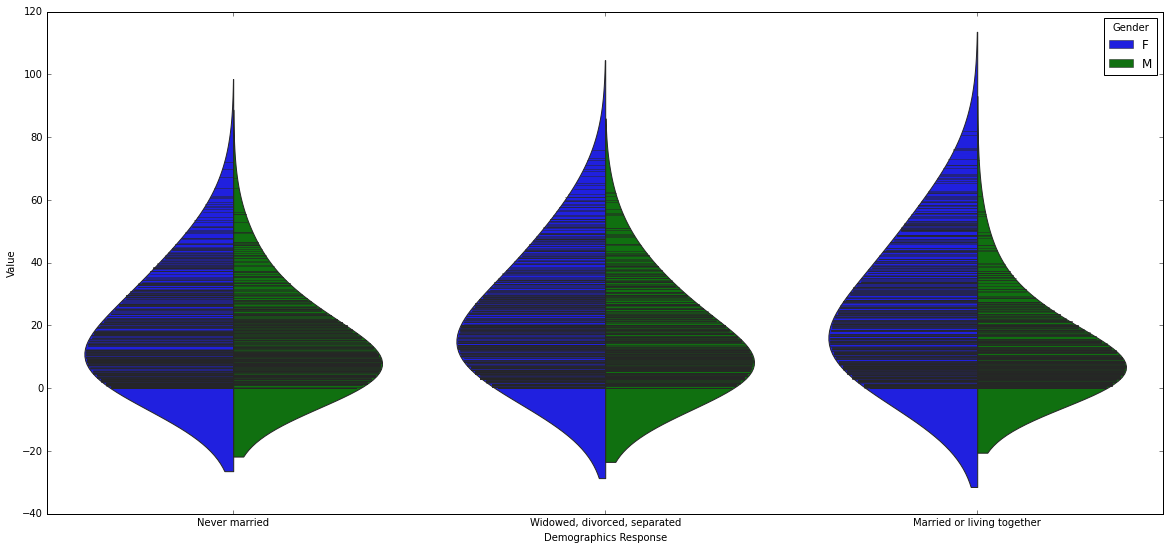

In [55]:
#plotting value to counts to understand the justifications provided by people with demographic questions of maritial status
plt.figure(figsize=(20,9))
sns.violinplot(x='Demographics Response', y='Value', hue='Gender',split=True, data=df4, scale="count", inner="stick", scale_hue=False,bw=0.8)

#Results of hypothesis 1: 
From the visualization above we can see that our hypothesis of having high values of justifying any violence is provided in married women. This hypothesis only stands true for the responses of females. For reponses of males it does not stand true as the highest values to count is provided to the one's who are divorced, widowed or separated. It shows how varried justification of violence do male and female of with different maritial status have.


#Question 1:
What is the reason which is justified for violence by most responses in the survey from value to count? 

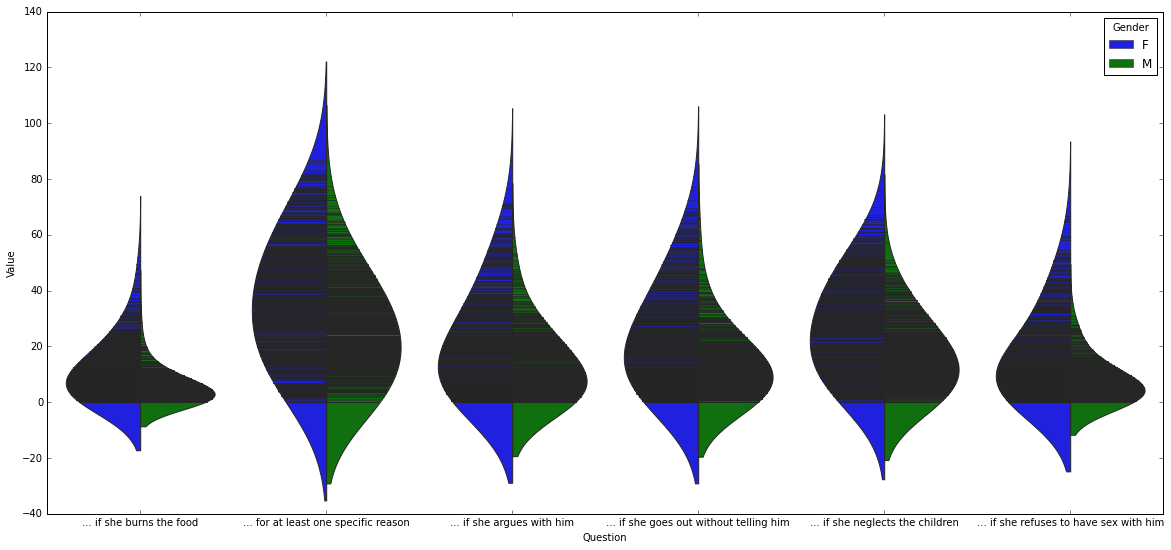

In [56]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Question', y='Value', hue='Gender',split=True, data=df, scale="count", inner="stick", scale_hue=False,bw=0.8)

#Ans1 : 
According to male responses the reason justified for violence agaisnt women is if she neglects the children. Whereas according to women it is justified if she goes out without telling him. 

In [0]:
df_final=df.loc[df['Question']=='... for at least one specific reason']

In [62]:
#Making a new dataframe which has average value for any specific reason for justification of violence in each country.
df_final1=df_final.groupby('Country')['Value'].mean().reset_index(name ='Average value')
df_final1.head()

,Country,Average value
0,Afghanistan,68.323333
1,Albania,10.883333
2,Angola,22.640000
3,Armenia,17.310000
4,Azerbaijan,50.083333


In [63]:
dataframe_2= pd.read_excel('https://query.data.world/s/c24qx3awkz2cpqhta2j6i4ysegvf3o')
dataframe_2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [64]:
dataframe_2.shape

(153, 20)

#Hypothesis 2:

In [65]:
#merging the data frames to check our hypothesis
merged_df= dataframe_2.merge(df_final1, how="inner", left_on='Country name',right_on='Country')
merged_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country,Average value
0,Guatemala,Latin America and Caribbean,6.3989,0.058398,6.513361,6.284440,8.924806,0.816621,64.808945,0.908148,-0.042939,0.783237,1.972317,0.753816,1.174267,0.705953,0.613147,0.170612,0.098360,2.882723,Guatemala,9.113333
1,Colombia,Latin America and Caribbean,6.1634,0.056481,6.274103,6.052698,9.500369,0.884440,67.699585,0.836180,-0.161236,0.864572,1.972317,0.932204,1.334451,0.810020,0.526890,0.092374,0.045848,2.421657,Colombia,4.646667
2,Nicaragua,Latin America and Caribbean,6.1371,0.063887,6.262319,6.011882,8.493160,0.857497,67.507179,0.863903,0.020959,0.665950,1.972317,0.620033,1.270813,0.803093,0.560117,0.212871,0.174085,2.496081,Nicaragua,6.260000
3,Philippines,Southeast Asia,6.0060,0.049858,6.103723,5.908278,8.993546,0.846730,61.926762,0.915463,-0.105463,0.733634,1.972317,0.775121,1.245382,0.602189,0.621915,0.129260,0.130386,2.501742,Philippines,5.923333
4,Honduras,Latin America and Caribbean,5.9532,0.065732,6.082034,5.824366,8.424535,0.821870,67.198769,0.870603,0.086969,0.801132,1.972317,0.598764,1.186664,0.791990,0.568148,0.256528,0.086807,2.464295,Honduras,11.346667


In [72]:
#plotting a scatterplot to check if there is any co-relation.
import plotly.express as px

fig = px.scatter(merged_df, x='Average value', y='Ladder score', color='Country name',size='Ladder score')
fig.show()


#Hypothesis 2:
From the scatter plot above we can see no linear relation between the happiness index and the average values. Thus, we can say that the hypothesis 2 is not true.

#Question 2:
Which is the country that has highest logged gdp per capita and perceptions of corruption amongst these countries?

In [67]:
df_que2=pd.DataFrame(merged_df,columns=['Country name','Logged GDP per capita','Perceptions of corruption','Average value'])
df_que2

,Country name,Logged GDP per capita,Perceptions of corruption,Average value
0,Guatemala,8.924806,0.783237,9.113333
1,Colombia,9.500369,0.864572,4.646667
2,Nicaragua,8.493160,0.665950,6.260000
3,Philippines,8.993546,0.733634,5.923333
4,Honduras,8.424535,0.801132,11.346667
5,Peru,9.456313,0.893715,2.020000
6,Bolivia,8.851115,0.822606,8.146667
7,Pakistan,8.482727,0.745705,36.073333
8,Dominican Republic,9.664881,0.756000,3.176667
9,Moldova,8.776714,0.913314,20.493333


In [71]:
#plotting the bar graph to check the maximum values.
fig_percapita= px.bar(df_que2,x='Country name',y='Logged GDP per capita',hover_data=['Average value'],animation_group='Logged GDP per capita')
fig_percapita.show()

#Answer2:
The country with highest logged gdp per capita is Turkey.

In [70]:
#plotting a bar graph to check the highest values.
fig_corruption= px.bar(df_que2,x='Country name',y='Perceptions of corruption',hover_data=['Average value'],color='Country name',animation_group='Perceptions of corruption')
fig_corruption.show()

#Answer2 :
The country with most perceptions to corruption is Afganistan 

#References:

1) https://plotly.com/python/line-and-scatter/

2) https://plotly.com/python/bar-charts/

3) https://worldhappiness.report/

4) https://seaborn.pydata.org/generated/seaborn.violinplot.html

5) https://www.surveymonkey.com/mp/how-to-analyze-survey-data/